In [ ]:
"""=============================================================================
   Ex3: SVD
   Câu 1: 
      a) Cho tập tin ex3.csv. Đọc tập tin vào dataframe
      b) Phân tích SVD: U, s, VT từ dataframe
      c) Tạo dataframe mới từ U, s, VT, nhận xét và rút gọn thành phần, nếu có thể
      d) Tìm error nếu có rút gọn thành phần 
============================================================================="""

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
LDS3folder = 'E:\Data Science\Mathematics and Statistics for Data Science\Excercise'
folder = LDS3folder + '/Data/B2/'

## a) Đọc tập tin ex3.csv vào dataframe
df = pd.read_csv(folder + 'ex3.csv', index_col=0)
print('\n*** a) Dataframe ex3.csv:\n', df, '\n')



*** a) Dataframe ex3.csv:
        post1  post2  post3  post4
word                             
ice        4      4      6      2
snow       6      1      0      5
tahoe      3      0      0      5
goal       0      6      5      1
puck       0      4      5      0 



In [4]:
## b) Phân tích SVD: U, s, VT
U, s, VT = np.linalg.svd(df)

print('\n*** b) Phân tích SVD:')
print('- Ma trận U(', U.shape[1], ', ', U.shape[0], '): \n', U, '\n')
print('- Eigenvalues:', s, '\n')
print('- Ma trận VT(', VT.shape[1], ', ', VT.shape[0], '): \n', VT, '\n')



*** b) Phân tích SVD:
- Ma trận U( 5 ,  5 ): 
 [[-0.62610079  0.01852561  0.6259093   0.23487748 -0.40090488]
 [-0.35134826 -0.67829097  0.0779915  -0.56006159  0.311005  ]
 [-0.21940528 -0.51980146 -0.50346468  0.6484906  -0.08747016]
 [-0.51965373  0.37026259 -0.59046979 -0.38005352 -0.31586445]
 [-0.40788911  0.36371724 -0.00485878  0.25726028  0.79695031]] 

- Eigenvalues: [13.3221948   9.2609512   2.41918664  1.37892883] 

- Ma trận VT( 4 ,  4 ): 
 [[-0.39563365 -0.57086917 -0.6301003  -0.34721178]
 [-0.59983555  0.33174302  0.4082791  -0.60286986]
 [ 0.60400142 -0.40535325  0.32193174 -0.60599586]
 [-0.34475152 -0.63225288  0.57675103  0.38569539]] 



In [5]:
## c) Tạo dataframe mới từ U, s, VT
col_headers = ['post1', 'post2', 'post3', 'post4']
words = ['ice', 'snow', 'tahoe', 'goal', 'puck']
new_df = pd.DataFrame(VT, columns=col_headers)
A_approx = np.matrix(U[:, :2]) * np.diag(s[:2]) * np.matrix(VT[:2, :])

print('\n*** c) NEW dataframe (using only the first two components):')
print(pd.DataFrame(A_approx, index=words, columns=col_headers))



*** c) NEW dataframe (using only the first two components):
          post1     post2     post3     post4
ice    3.197084  4.818556  5.325736  2.792675
snow   5.619793  0.588201  0.384675  5.412204
tahoe  4.043943  0.071665 -0.123639  3.917015
goal   0.682117  5.089628  5.762122  0.336491
puck   0.129398  4.219523  4.799185 -0.143946


In [6]:
## d) Tìm error
print("\n*** d) Error from actual value:")
print(df - A_approx)



*** d) Error from actual value:
          post1     post2     post3     post4
word                                         
ice    0.802916 -0.818556  0.674264 -0.792675
snow   0.380207  0.411799 -0.384675 -0.412204
tahoe -1.043943 -0.071665  0.123639  1.082985
goal  -0.682117  0.910372 -0.762122  0.663509
puck  -0.129398 -0.219523  0.200815  0.143946


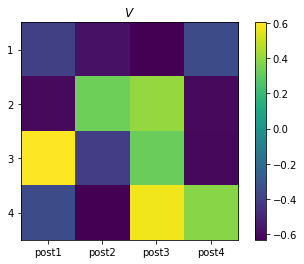

In [9]:
## e) Hiển thị
plt.imshow(VT, interpolation='none')
plt.xticks(range(len(col_headers)))
plt.yticks(range(len(words)))
plt.ylim([len(words) - 1.5, -.5])
ax = plt.gca()
ax.set_xticklabels(col_headers)
ax.set_yticklabels(range(1, len(words) + 1))
plt.title("$V$")
plt.colorbar()
